In [1]:
%matplotlib inline
import os, sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import f1_score, classification_report, confusion_matrix, make_scorer
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras import backend as K
import tensorflow as tf

Using TensorFlow backend.


In [2]:
sys.path.append('/home/admin/github/wordroid.sblo.jp/lib')
from keras_ex.gkernel import GaussianKernel, GaussianKernel2, GaussianKernel3
from keras_ex.gkernel.sklearn import (
    RBFClassifier, RBFRegressor,
    make_model_gkernel3,
    make_model_gkernel2,
    make_model_gkernel1,
    make_model_out,
    make_model
)

In [3]:
iris = datasets.load_iris()
X = iris.data.astype(np.float32)
Y = iris.target
N = Y.size
Y2 = keras.utils.to_categorical(Y, num_classes=3)

index = np.arange(N)
xtrain = X[index[index % 2 != 0],:]
ytrain = Y2[index[index % 2 != 0]]
xtest = X[index[index % 2 == 0],:]
yans = Y2[index[index % 2 == 0]]

In [4]:
import warnings
warnings.filterwarnings('ignore')

## no parameters
* lm (landmarks) is set automatically
* default is 2

```python
    if lm is None:
        rs = np.random.RandomState(random_state)
        lm = rs.random_sample((num_lm, nn))
```

In [5]:
clf = RBFClassifier()
hst = clf.fit(xtrain, ytrain, epochs=1, verbose=0)

W1004 23:39:13.315784 139969912796992 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W1004 23:39:13.319056 139969912796992 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1004 23:39:13.355248 139969912796992 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1004 23:39:13.356208 139969912796992 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: T

In [6]:
'''
get landmarks
'''
lm = clf.current_lm()
lm

array([[0.38541904, 0.86173606, 0.29138315, 0.55025774],
       [0.18000647, 0.61885023, 0.88004404, 0.9072325 ]], dtype=float32)

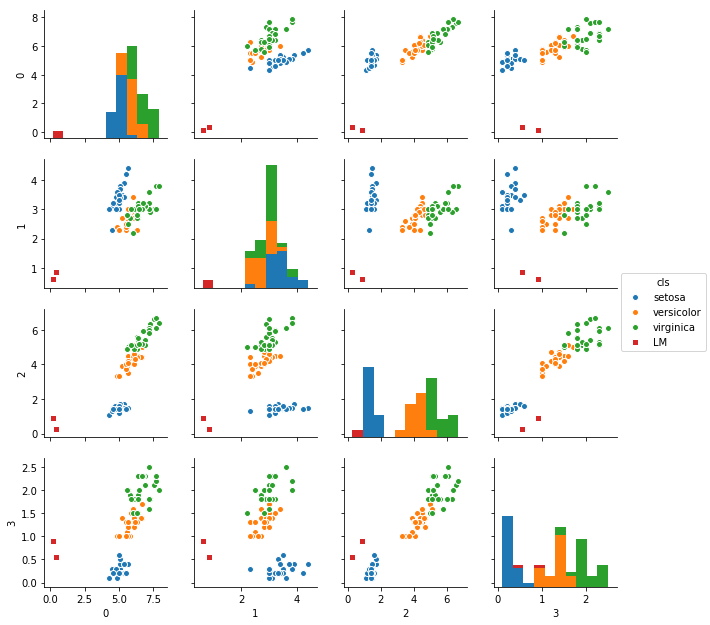

In [7]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = [iris.target_names[ii] for ii in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['o']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

## set landmarks manually

In [8]:
num_lm = 15
init_lm = np.c_[
    np.random.random((num_lm,))*4+4,
    np.random.random((num_lm,))*2+2.5,
    np.random.random((num_lm,))*4+2,
    np.random.random((num_lm,))*2.5
]

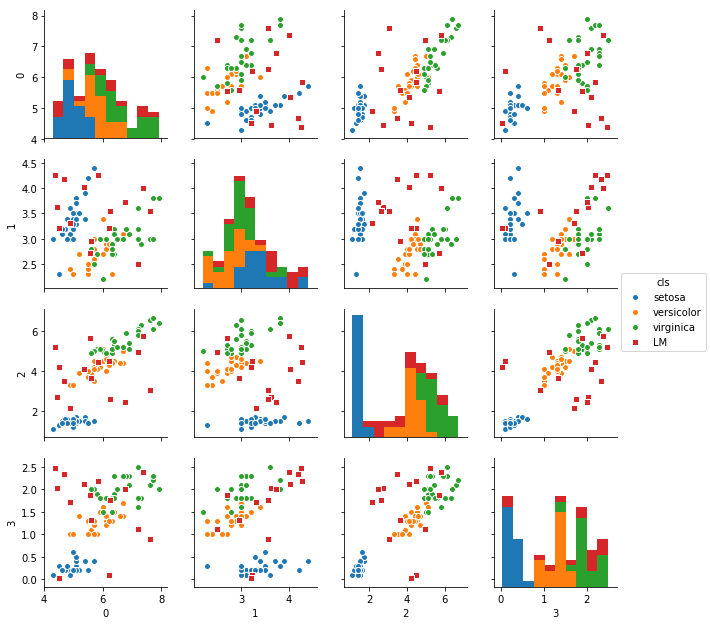

In [9]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = [iris.target_names[ii] for ii in np.argmax(ytrain, axis=1)] + ['LM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['o']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [10]:
clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm
)

In [11]:
hst = clf.fit(xtrain, ytrain, epochs=1, verbose=0)

## set landmarks manually (2)

In [12]:
num_lm = 15
init_lm = xtrain[np.random.choice(np.arange(xtrain.shape[0]), num_lm, replace=False)]

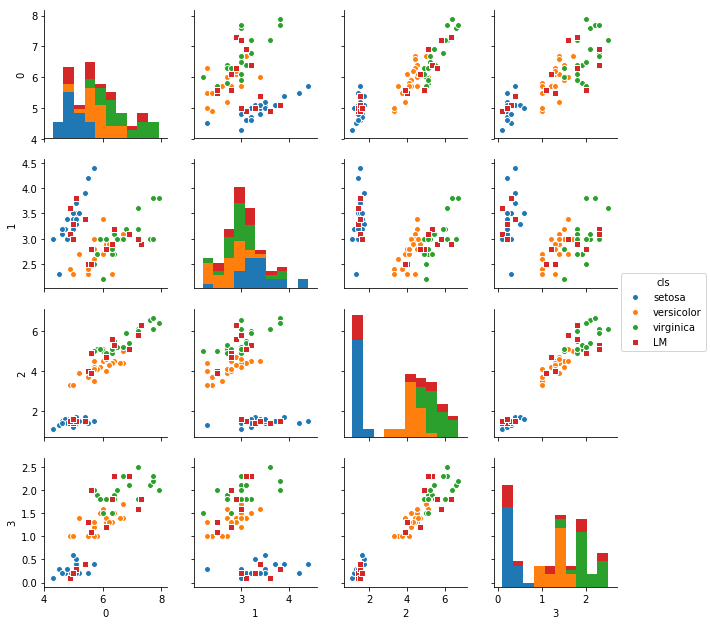

In [13]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = [iris.target_names[ii] for ii in np.argmax(ytrain, axis=1)] + ['LM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['o']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [14]:
clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm
)

In [15]:
hst = clf.fit(xtrain, ytrain, epochs=1, verbose=0)

## set landmarks automatically on input x
* lm_select_from_x=True
* even if lm is given, it is ignored

In [16]:
num_lm = 15
clf = RBFClassifier(
    num_lm=num_lm,
    lm_select_from_x=True,
    random_state=10001
)

In [17]:
'''lm is not set unless fit is executed'''
hst = clf.fit(xtrain, ytrain, epochs=0, verbose=0)

In [18]:
lm = clf.current_lm()
lm

array([[6. , 3.4, 4.5, 1.6],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 3.2, 5.3, 2.3],
       [5.5, 4.2, 1.4, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6. , 2.2, 5. , 1.5],
       [4.6, 3.1, 1.5, 0.2],
       [5.5, 2.3, 4. , 1.3],
       [4.9, 3. , 1.4, 0.2],
       [6.3, 2.8, 5.1, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.5, 5. , 2. ],
       [5. , 3.4, 1.5, 0.2],
       [5.7, 2.6, 3.5, 1. ],
       [6.8, 3.2, 5.9, 2.3]], dtype=float32)

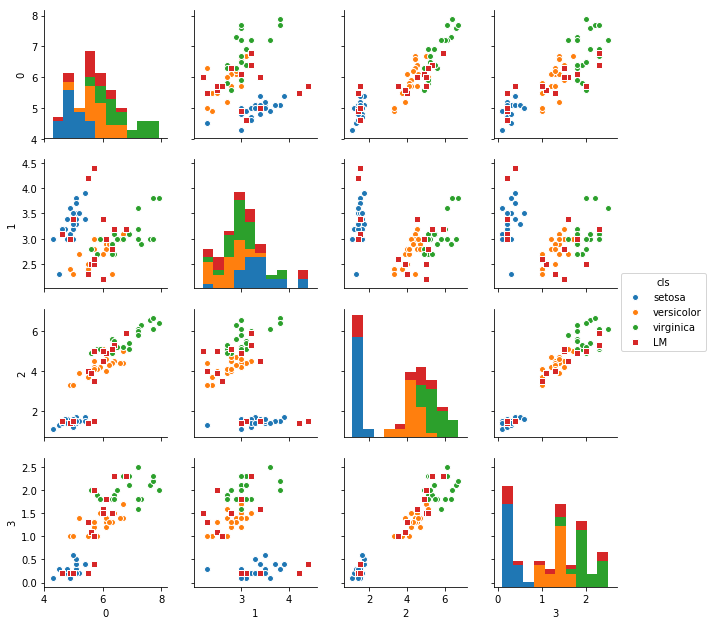

In [19]:
df = pd.DataFrame(np.r_[xtrain, lm])
df['cls'] = [iris.target_names[ii] for ii in np.argmax(ytrain, axis=1)] + ['LM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['o']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

## by default, landmarks are not trained

In [20]:
'''set landmarks manually'''
num_lm = 25
init_lm = np.c_[
    np.random.random((num_lm,))*4+4,
    np.random.random((num_lm,))*2+2.5,
    np.random.random((num_lm,))*4+2,
    np.random.random((num_lm,))*2.5
]
init_lm

array([[5.63129675, 2.98388224, 2.19929466, 1.38799428],
       [7.62805051, 3.92303932, 5.75648468, 1.24711146],
       [4.30269759, 2.66941501, 5.93456124, 0.51923027],
       [5.71739909, 3.81214085, 4.15152553, 0.6162737 ],
       [7.62649147, 2.65380886, 3.11553416, 0.25190096],
       [6.23278533, 2.90393331, 5.56482047, 2.31127389],
       [4.00121337, 3.67952161, 2.54903774, 0.46303085],
       [7.41266472, 2.71683731, 4.78838746, 0.36592774],
       [6.48997265, 4.03510444, 5.07107352, 2.19828023],
       [7.74992272, 4.21406111, 4.70210716, 1.79546737],
       [7.15555064, 3.75105962, 3.11567405, 1.89699482],
       [5.51755759, 2.8766336 , 5.33783799, 0.96274289],
       [6.03432815, 2.99786943, 3.91933156, 2.18874576],
       [7.22290622, 3.02509463, 5.86904189, 0.93820178],
       [4.03729274, 3.49185443, 2.24268444, 2.48736694],
       [4.03175465, 2.90114768, 3.00266123, 2.13903227],
       [5.22541567, 4.4778041 , 4.21746447, 0.44301295],
       [5.92420188, 4.38160936,

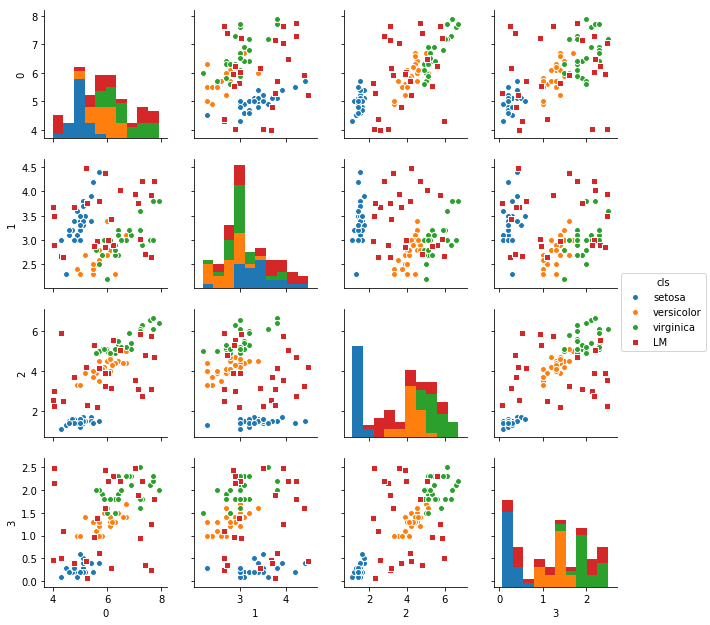

In [21]:
df = pd.DataFrame(np.r_[xtrain, init_lm])
df['cls'] = [iris.target_names[ii] for ii in np.argmax(ytrain, axis=1)] + ['LM']*init_lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['o']*3+['s'], hue='cls', size=2.2, diag_kind='hist')

In [22]:
%%time
clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm
)

hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 3.29 s, sys: 57.9 ms, total: 3.35 s
Wall time: 2.96 s


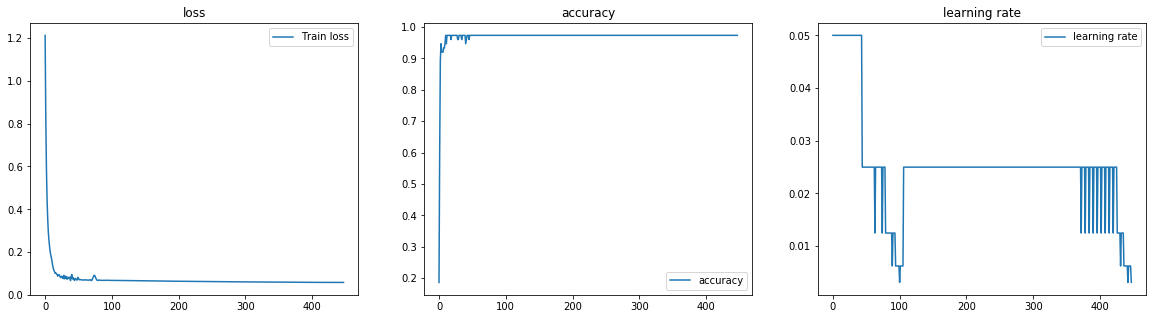

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [24]:
lm = clf.current_lm()
lm

array([[5.6312966 , 2.9838822 , 2.1992946 , 1.3879943 ],
       [7.6280503 , 3.9230394 , 5.7564845 , 1.2471114 ],
       [4.3026977 , 2.669415  , 5.9345613 , 0.51923025],
       [5.717399  , 3.812141  , 4.1515255 , 0.6162737 ],
       [7.6264915 , 2.6538088 , 3.115534  , 0.25190097],
       [6.232785  , 2.9039333 , 5.5648203 , 2.3112738 ],
       [4.0012136 , 3.6795216 , 2.5490377 , 0.46303084],
       [7.412665  , 2.7168374 , 4.7883873 , 0.36592776],
       [6.4899726 , 4.0351043 , 5.0710735 , 2.1982803 ],
       [7.7499228 , 4.2140613 , 4.702107  , 1.7954674 ],
       [7.1555505 , 3.7510595 , 3.115674  , 1.8969948 ],
       [5.5175576 , 2.8766336 , 5.337838  , 0.96274287],
       [6.034328  , 2.9978695 , 3.9193316 , 2.1887457 ],
       [7.222906  , 3.0250947 , 5.869042  , 0.9382018 ],
       [4.037293  , 3.4918544 , 2.2426844 , 2.487367  ],
       [4.0317545 , 2.9011476 , 3.0026612 , 2.1390324 ],
       [5.2254157 , 4.477804  , 4.2174644 , 0.44301295],
       [5.924202  , 4.3816094 ,

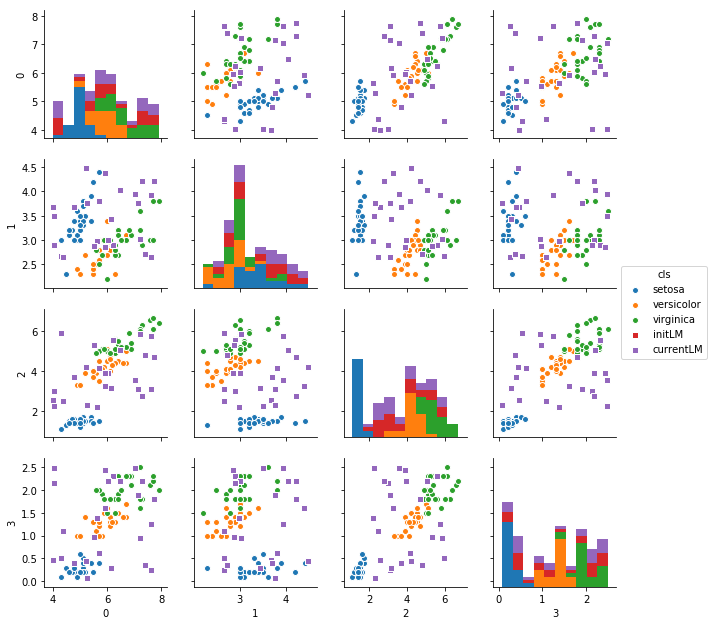

In [25]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = [iris.target_names[ii] for ii in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['currentLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['o']*3+['s','s'], hue='cls', size=2.2, diag_kind='hist')

## use 'make_model_gkernel3' to train lm

In [26]:
%%time
clf = RBFClassifier(
    num_lm=num_lm,
    lm=init_lm,
    make_model_gkernel=make_model_gkernel3
)

hst = clf.fit(xtrain, ytrain, epochs=200, verbose=0)

CPU times: user 3.24 s, sys: 46.5 ms, total: 3.28 s
Wall time: 2.98 s


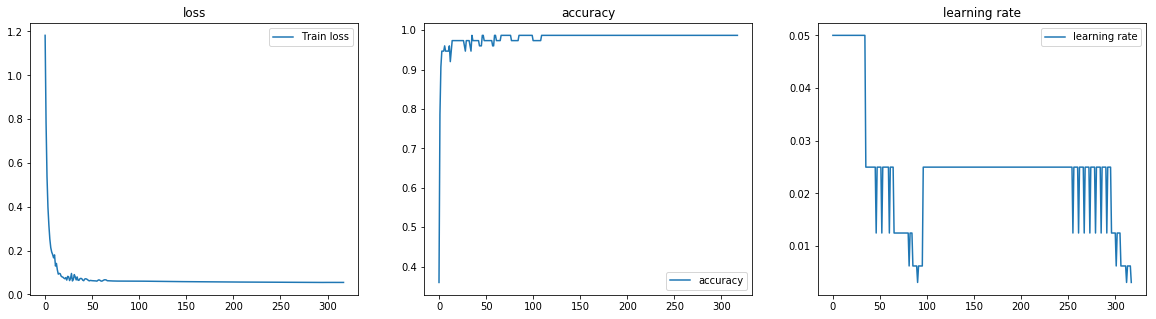

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [28]:
lm = clf.current_lm()
lm

array([[5.340373  , 3.5325294 , 1.6683158 , 0.3751398 ],
       [7.2104683 , 3.5679188 , 6.1950803 , 2.6341126 ],
       [4.744102  , 2.4680147 , 5.545306  , 2.4258027 ],
       [6.49154   , 3.5136006 , 4.1276016 , 0.4573303 ],
       [7.19449   , 3.3954074 , 3.715576  , 0.5460261 ],
       [5.9377904 , 2.642581  , 5.247819  , 2.6633434 ],
       [4.9675007 , 3.544225  , 1.5145204 , 0.1599679 ],
       [7.1581616 , 3.3716145 , 4.297781  , 0.48505384],
       [5.909827  , 3.4150555 , 5.2326217 , 2.7534325 ],
       [7.265577  , 3.8535724 , 5.9954996 , 2.860518  ],
       [7.171419  , 3.4512744 , 3.5293953 , 0.7312583 ],
       [5.6450872 , 2.4264975 , 4.785955  , 2.583419  ],
       [6.4298825 , 3.1456647 , 3.5866702 , 0.906336  ],
       [6.8144507 , 2.4796135 , 6.091831  , 2.2626307 ],
       [4.791518  , 3.790855  , 1.1588333 , 1.1432071 ],
       [4.1095896 , 2.3637698 , 2.8985329 , 1.0472997 ],
       [5.8607297 , 4.0250273 , 4.2027617 , 0.2512817 ],
       [6.930048  , 3.9837375 ,

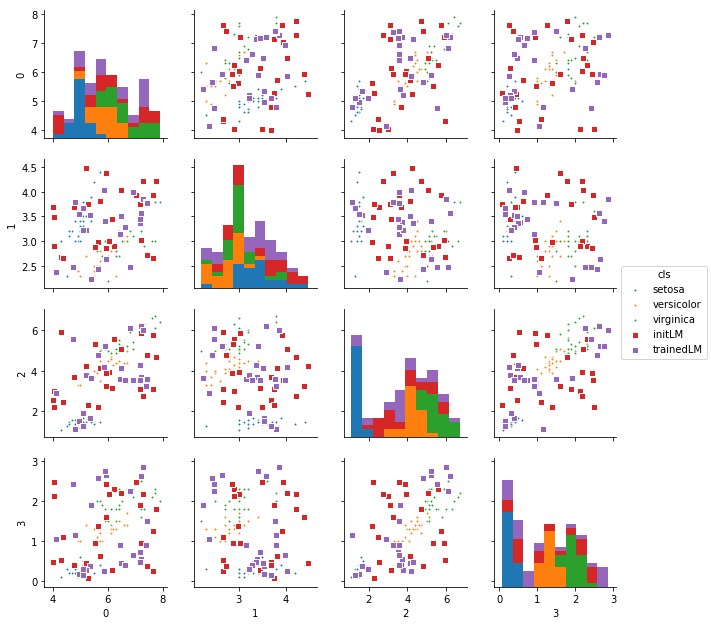

In [29]:
df = pd.DataFrame(np.r_[xtrain, init_lm, lm])
df['cls'] = [iris.target_names[ii] for ii in np.argmax(ytrain, axis=1)] + ['initLM']*init_lm.shape[0] + ['trainedLM']*lm.shape[0]
df.head()

fig = sns.pairplot(df, markers=['.']*3+['s','s'], hue='cls', size=2.2, diag_kind='hist')